# Question

# Importing Dependencies

In [1]:
import mysql.connector
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

C:\Users\User\AppData\Roaming\Python\Python39\site-packages\matplotlib\projections\__init__.py:63: UserWarning: Unable to import Axes3D. This may be due to multiple versions of Matplotlib being installed (e.g. as a system package and as a pip package). As a result, the 3D projection is not available.
  warnings.warn("Unable to import Axes3D. This may be due to multiple versions of "


In [2]:

db_config = {
    "host": "localhost",
    "user": "root",
    "password": "123456"
}

connection = mysql.connector.connect(**db_config)

cursor = connection.cursor()





##### Selecting the database

In [3]:
cursor.execute("USE prc1")

##### Name of all the table present in the database 

In [4]:
cursor.execute("SHOW TABLES")
tables = cursor.fetchall()
print(tables)
for table in tables:
    print(table[0])

[('athlete_events',), ('noc_regions',), ('olm',), ('shopping_trnd',), ('super_str',)]
athlete_events
noc_regions
olm
shopping_trnd
super_str


##### Getting data from shopping_trnd table

In [5]:
query="select * from athlete_events;"
df=pd.read_sql(query,connection)
df


C:\ProgramData\Anaconda3\lib\site-packages\pandas\io\sql.py:762: UserWarning: pandas only support SQLAlchemy connectable(engine/connection) ordatabase string URI or sqlite3 DBAPI2 connectionother DBAPI2 objects are not tested, please consider using SQLAlchemy
  warnings.warn(


,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
0,1,A Dijiang,M,24,180,80,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,NA
1,2,A Lamusi,M,23,170,60,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,NA
2,3,Gunnar Nielsen Aaby,M,24,NA,NA,Denmark,DEN,1920 Summer,1920,Summer,Antwerpen,Football,Football Men's Football,NA
3,4,Edgar Lindenau Aabye,M,34,NA,NA,Denmark/Sweden,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold
4,5,Christine Jacoba Aaftink,F,21,185,82,Netherlands,NED,1988 Winter,1988,Winter,Calgary,Speed Skating,Speed Skating Women's 500 metres,NA
5,5,Christine Jacoba Aaftink,F,21,185,82,Netherlands,NED,1988 Winter,1988,Winter,Calgary,Speed Skating,"Speed Skating Women's 1,000 metres",NA
6,5,Christine Jacoba Aaftink,F,25,185,82,Netherlands,NED,1992 Winter,1992,Winter,Albertville,Speed Skating,Speed Skating Women's 500 metres,NA
7,5,Christine Jacoba Aaftink,F,25,185,82,Netherlands,NED,1992 Winter,1992,Winter,Albertville,Speed Skating,"Speed Skating Women's 1,000 metres",NA
8,5,Christine Jacoba Aaftink,F,27,185,82,Netherlands,NED,1994 Winter,1994,Winter,Lillehammer,Speed Skating,Speed Skating Women's 500 metres,NA
9,5,Christine Jacoba Aaftink,F,27,185,82,Netherlands,NED,1994 Winter,1994,Winter,Lillehammer,Speed Skating,"Speed Skating Women's 1,000 metres",NA


## Question 1: Which gender has a higher purchasing frequency, males or females?

In [6]:
query1="""
SELECT Gender, SUM(Purchase_amount_usd) AS `Male/Female` 
FROM shopping_trnd 
GROUP BY Gender 
ORDER BY `Male/Female` DESC;

"""
cursor.execute(query1)
result1 = cursor.fetchall()
df1=pd.DataFrame(result1,columns=['Gender','Total_purchased_amount'])
df1


,Gender,Total_purchased_amount
0,Male,157890
1,Female,75191


# Question 2: Which age group tends to purchase specific items more frequently?

In [7]:
query2="""
SELECT Gender, Age, Item_Purchased, COUNT(Item_Purchased) as ItemPurchaseCount
FROM shopping_trnd
GROUP BY Gender,Age, Item_Purchased
ORDER BY Age;
"""
cursor.execute(query2)
result2 = cursor.fetchall()
df2=pd.DataFrame(result2,columns=['Gender','Age','Item_Purchased','ItemPurchaseCount'])
df2

,Gender,Age,Item_Purchased,ItemPurchaseCount
0,Male,18,Jacket,4
1,Male,18,Hoodie,1
2,Male,18,Dress,3
3,Male,18,Socks,4
4,Male,18,Belt,1
...,...,...,...,...
1957,Female,70,Blouse,1
1958,Female,70,Sandals,1
1959,Female,70,Sweater,2
1960,Female,70,Skirt,1


In [8]:

un=df2['Item_Purchased'].unique()
maxCount=[]
age=[]
gender=[]
for i in un:
    v=[]
    v2=[]
    v3=[]
    for j in range(len(df2['Item_Purchased'])):
        
        if df2['Item_Purchased'][j]==i:
            v.append(int(df2['ItemPurchaseCount'][j]))
            v2.append(int(df2['Age'][j]))
            v3.append(df2['Gender'][j])
        else:
            pass
    maxCount.append(max(v))
    age.append(max(v2))
    gender.append(v3[v.index(max(v))])
    
dic2={
    'Age':age,'Item':un,'CountItem':maxCount,'Gender':gender
}
df2=pd.DataFrame(dic2)
df2

,Age,Item,CountItem,Gender
0,70,Jacket,7,Male
1,70,Hoodie,7,Male
2,70,Dress,4,Male
3,70,Socks,7,Male
4,70,Belt,5,Female
5,70,Sweater,9,Male
6,70,Boots,5,Male
7,70,Shirt,5,Male
8,70,Jeans,5,Male
9,70,Sneakers,5,Male


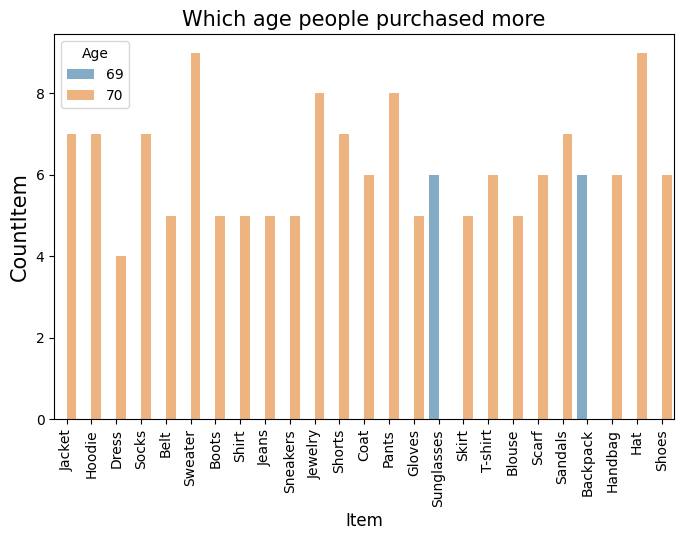

In [9]:
plt.figure(figsize=(8, 5))
sns.barplot(x="Item",y="CountItem",data=df2,hue='Age',alpha=0.6,linewidth="5",linestyle=":")
ax=plt.gca()
ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
plt.title("Which age people purchased more",fontsize=15)
plt.xlabel("Item",fontsize=12)
plt.ylabel("CountItem",fontsize=15)
plt.show()

## Question 3: Which product saw a higher purchase frequency across different genders?

In [10]:
query14="""
SELECT Gender,Item_Purchased, COUNT(Item_Purchased) as ItemPurchaseCount
FROM shopping_trnd
GROUP BY Gender, Item_Purchased;
"""
cursor.execute(query14)
result14 = cursor.fetchall()
df14=pd.DataFrame(result14,columns=['Gender','Item_Purchased','ItemPurchaseCount'])
df14

,Gender,Item_Purchased,ItemPurchaseCount
0,Male,Blouse,105
1,Male,Sweater,114
2,Male,Jeans,95
3,Male,Sandals,101
4,Male,Sneakers,103
5,Male,Shirt,110
6,Male,Shorts,109
7,Male,Coat,114
8,Male,Handbag,95
9,Male,Shoes,102


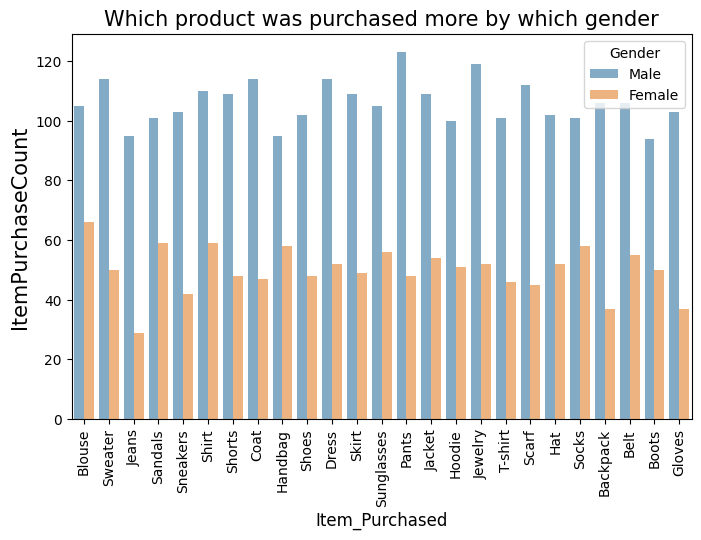

In [11]:
plt.figure(figsize=(8, 5))
sns.barplot(x="Item_Purchased",y="ItemPurchaseCount",data=df14,hue='Gender',alpha=0.6,linewidth="5",linestyle=":")
ax=plt.gca()
ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
plt.title("Which product was purchased more by which gender",fontsize=15)
plt.xlabel("Item_Purchased",fontsize=12)
plt.ylabel("ItemPurchaseCount",fontsize=15)
plt.show()

##   Question 4:  Calculate the total purchase amount for each category?
 

In [12]:
query3="""
SELECT Category, SUM(Purchase_amount_usd) AS total_sell_price
FROM shopping_trnd
GROUP BY Category
ORDER BY total_sell_price DESC;
"""
cursor.execute(query3)
result3 = cursor.fetchall()
df3=pd.DataFrame(result3,columns=['Category','total_sell_price'])
pd.set_option("display.max_rows",None)
df3
               

,Category,total_sell_price
0,Clothing,104264
1,Accessories,74200
2,Footwear,36093
3,Outerwear,18524


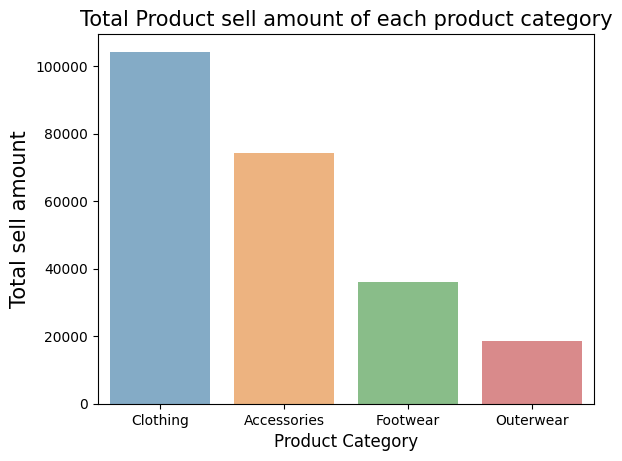

In [13]:
sns.barplot(x="Category",y="total_sell_price",data=df3,alpha=0.6,linewidth="4",linestyle=":")
plt.title("Total Product sell amount of each product category",fontsize=15)
plt.xlabel("Product Category",fontsize=12)
plt.ylabel("Total sell amount",fontsize=15)
plt.show()

## Question 5: How many products were sold within each product category throughout the season?






In [14]:
query="""
  SELECT Season, Category, COUNT(Category) AS categoryCount
  FROM shopping_trnd GROUP BY Season,
  Category ORDER BY categoryCount DESC;
"""
cursor.execute(query)
result4 = cursor.fetchall()
df4=pd.DataFrame(result4,columns=['Season','Category','categoryCount'])
pd.set_option("display.max_rows",None)
df4

,Season,Category,categoryCount
0,Spring,Clothing,454
1,Winter,Clothing,448
2,Fall,Clothing,427
3,Summer,Clothing,408
4,Fall,Accessories,324
5,Summer,Accessories,312
6,Winter,Accessories,303
7,Spring,Accessories,301
8,Spring,Footwear,163
9,Summer,Footwear,160


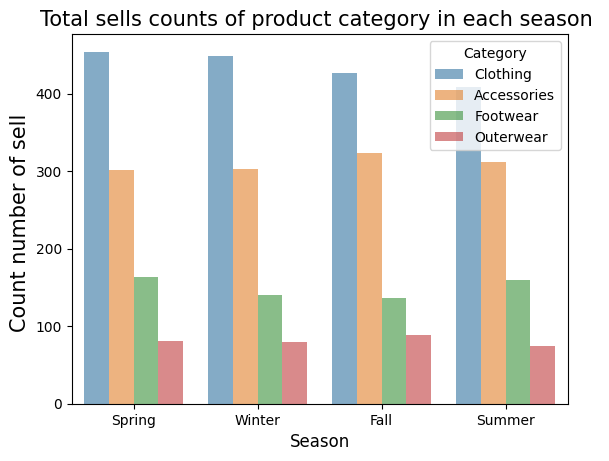

In [15]:
sns.barplot(x="Season",y="categoryCount",hue='Category',data=df4,alpha=0.6,linewidth="4",linestyle=":")
plt.title("Total sells counts of product category in each season ",fontsize=15)
plt.xlabel("Season",fontsize=12)
plt.ylabel("Count number of sell ",fontsize=15)
plt.show()

## Question 6: What were the highest and lowest selling products during each season?

In [45]:
query5="""
  SELECT Season, Item_Purchased, COUNT(Item_Purchased) AS categoryCount
FROM shopping_trnd
GROUP BY Season, Item_Purchased
ORDER BY categoryCount DESC;
"""
cursor.execute(query5)
result5 = cursor.fetchall()
df5=pd.DataFrame(result5,columns=['Season','Item_Purchased','categoryCount'])
pd.set_option("display.max_rows",None)
df5

,Season,Item_Purchased,categoryCount
0,Fall,Jacket,54
1,Spring,Sweater,52
2,Winter,Sunglasses,52
3,Winter,Pants,51
4,Winter,Shirt,50
5,Summer,Pants,50
6,Fall,Hat,50
7,Winter,Hoodie,48
8,Fall,Handbag,48
9,Spring,Shorts,47


In [46]:

un=df5['Item_Purchased'].unique()

maxCount=[]
minCount=[]
season=[]

for i in un:
    v=[]
    v2=[]
    
    
    for j in range(len(df5['Item_Purchased'])):
        
        if df5['Item_Purchased'][j]==i:
            v.append(int(df5['categoryCount'][j]))
            v2.append(df5['Season'][j])
            
        else:
            pass
    maxCount.append(max(v))
    minCount.append(min(v))
    season.append(v2[v.index(max(v))])
    
dic5={
    'Season':season,'Item':un,'maxSold':maxCount,'MinSold':minCount
}
df5=pd.DataFrame(dic5)
df5

,Season,Item,maxSold,MinSold
0,Fall,Jacket,54,33
1,Spring,Sweater,52,28
2,Winter,Sunglasses,52,33
3,Winter,Pants,51,32
4,Winter,Shirt,50,38
5,Fall,Hat,50,27
6,Winter,Hoodie,48,31
7,Fall,Handbag,48,34
8,Spring,Shorts,47,35
9,Summer,Jewelry,47,35


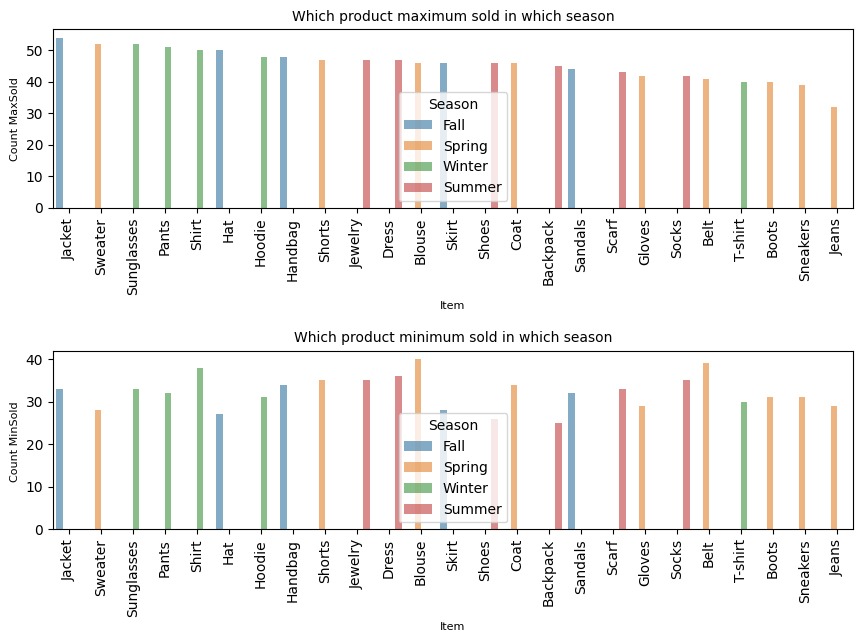

In [47]:

plt.figure(figsize=(8, 5))



# Plot the first subplot
plt.subplot(2, 1, 1)
sns.barplot(x="Item", y="maxSold", data=df5,hue='Season', alpha=0.6, linewidth="4", linestyle=":")
ax=plt.gca()
ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
plt.subplots_adjust(left=0.0,bottom=0.0,right=1.0,top=1.0,wspace=0.8,hspace=0.8)
plt.title("Which product maximum sold in which season", fontsize=10)
plt.xlabel("Item", fontsize=8)
plt.ylabel("Count MaxSold", fontsize=8)



# Plot the second subplot
plt.subplot(2, 1, 2)
sns.barplot(x="Item", y="MinSold", data=df5,hue='Season', alpha=0.6, linewidth="4", linestyle=":")
ax=plt.gca()
ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
plt.subplots_adjust(left=0.0,bottom=0.0,right=1.0,top=1.0,wspace=0.8,hspace=0.8)
plt.title("Which product minimum sold in which season", fontsize=10)
plt.xlabel("Item", fontsize=8)
plt.ylabel("Count MinSold ", fontsize=8)

plt.show()


##  Question 7: which products are sold maximum and minimum in which season?

In [48]:
query6="""
SELECT  Item_Purchased, MAX(Season) AS maxProductSell, MIN(Season) AS minProductSell
FROM shopping_trnd
GROUP BY  Item_Purchased; 
"""
cursor.execute(query6)
result6 = cursor.fetchall()
df6=pd.DataFrame(result6,columns=['Item_Purchased','maxProductSell','minProductSell'])
pd.set_option("display.max_rows",None)
df6

,Item_Purchased,maxProductSell,minProductSell
0,Blouse,Winter,Fall
1,Sweater,Winter,Fall
2,Jeans,Winter,Fall
3,Sandals,Winter,Fall
4,Sneakers,Winter,Fall
5,Shirt,Winter,Fall
6,Shorts,Winter,Fall
7,Coat,Winter,Fall
8,Handbag,Winter,Fall
9,Shoes,Winter,Fall


## Question 8: Which age group purchased the most and least of each product?

In [49]:
query7="""
SELECT Age, MAX(Item_Purchased) as MostPurchased, 
MIN(Item_Purchased) as LessPurchased 
FROM shopping_trnd
GROUP BY Age
ORDER BY Age DESC;
"""
cursor.execute(query7)
result7 = cursor.fetchall()
df7=pd.DataFrame(result7,columns=['Age','MostPurchased','LessPurchased'])
pd.set_option("display.max_rows",None)
df7

,Age,MostPurchased,LessPurchased
0,70,T-shirt,Belt
1,69,T-shirt,Backpack
2,68,T-shirt,Backpack
3,67,T-shirt,Backpack
4,66,T-shirt,Backpack
5,65,T-shirt,Backpack
6,64,Sweater,Backpack
7,63,T-shirt,Backpack
8,62,T-shirt,Backpack
9,61,T-shirt,Belt


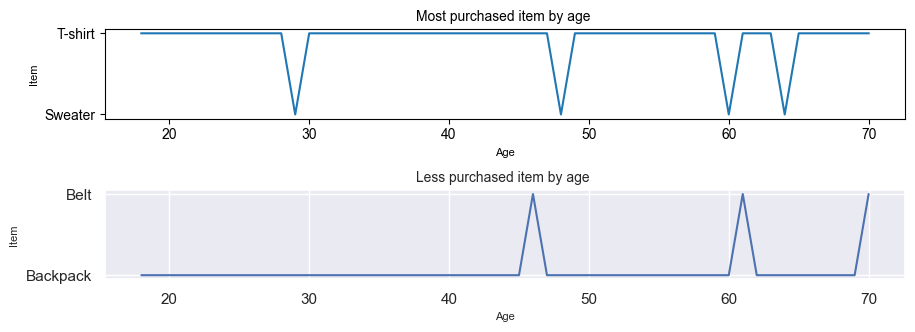

In [50]:

plt.figure(figsize=(8, 5))



# Plot the first subplot
plt.subplot(2, 1, 1)
sns.lineplot(x="Age",y="MostPurchased",data=df7)
plt.subplots_adjust(left=0.0,bottom=0.0,right=1.0,top=1.0,wspace=0.8,hspace=0.8)
sns.set(style="darkgrid")
plt.title("Most purchased item by age ", fontsize=10)
plt.xlabel("Age", fontsize=8)
plt.ylabel("Item", fontsize=8)



# Plot the second subplot
plt.subplot(2, 1, 2)
sns.lineplot(x="Age",y="LessPurchased",data=df7)
plt.subplots_adjust(left=0.0,bottom=0.0,right=1.0,top=0.5,wspace=0.8,hspace=0.8)
sns.set(style="darkgrid")
plt.title("Less purchased item by age ", fontsize=10)
plt.xlabel("Age", fontsize=8)
plt.ylabel("Item ", fontsize=8)





# Show the plot
plt.show()


## Question 9: What age groups showed the highest, lowest, and average levels of interest in purchasing an item?







In [51]:
query8="""
SELECT Item_Purchased, MAX(Age) as MostPurchased, 
MIN(Age) as LessPurchased,  ROUND(AVG(Age)) as AvgPurchased
FROM shopping_trnd
GROUP BY Item_Purchased
ORDER BY Item_Purchased DESC;
"""
cursor.execute(query8)
result8 = cursor.fetchall()
df8=pd.DataFrame(result8,columns=['Item_Purchased','MostPurchased','LessPurchased','AvgPurchased'])
pd.set_option("display.max_rows",None)
df8

,Item_Purchased,MostPurchased,LessPurchased,AvgPurchased
0,T-shirt,70,18,43
1,Sweater,70,18,43
2,Sunglasses,69,18,45
3,Socks,70,18,45
4,Sneakers,70,18,43
5,Skirt,70,18,44
6,Shorts,70,18,43
7,Shoes,70,19,46
8,Shirt,70,18,42
9,Scarf,70,18,44


## Question 10: What age group exhibited the highest purchasing activity?

In [52]:
query10="""
SELECT Age, COUNT(Age) as countAge from shopping_trnd
group by Age
order by countAge DESC;
"""
cursor.execute(query10)
result10 = cursor.fetchall()
df10=pd.DataFrame(result10,columns=['Age','countAge'])
pd.set_option("display.max_rows",None)
df10

,Age,countAge
0,69,88
1,57,87
2,41,86
3,25,85
4,49,84
5,50,83
6,27,83
7,62,83
8,54,83
9,32,82


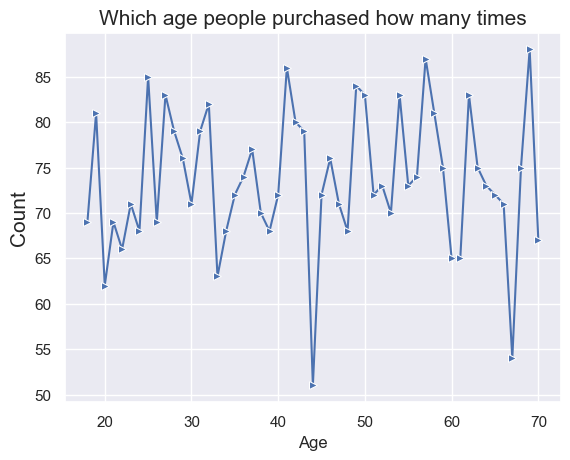

In [53]:
sns.lineplot(x="Age",y="countAge",data=df10,palette="Accent_r",marker=">",legend="brief")
plt.title("Which age people purchased how many times",fontsize=15)
plt.xlabel("Age",fontsize=12)
plt.ylabel("Count",fontsize=15)
plt.show()

## Question 11: How many times was each item purchased within three age groups: below 30, between 31 and 50, and above 50?

In [54]:
query12="""
SELECT
    CASE
        WHEN Age < 30 THEN 'Below 30'
        WHEN Age >= 31 AND Age <= 50 THEN '31-50'
        ELSE 'Above 50'
    END AS Age_Group,
    Item_Purchased,
    COUNT(*) AS Purchase_Count 
FROM shopping_trnd 
GROUP BY Age_Group, Item_Purchased
ORDER BY Age_Group, Purchase_Count DESC;
"""
cursor.execute(query12)
result12 = cursor.fetchall()
df12=pd.DataFrame(result12,columns=['Age_Group','Item_Purchased','Purchase_Count'])
pd.set_option("display.max_rows",None)
df12

,Age_Group,Item_Purchased,Purchase_Count
0,31-50,Jacket,71
1,31-50,Belt,70
2,31-50,Shirt,69
3,31-50,Hoodie,68
4,31-50,Pants,68
5,31-50,Scarf,66
6,31-50,Sandals,64
7,31-50,Backpack,63
8,31-50,Dress,62
9,31-50,Hat,61


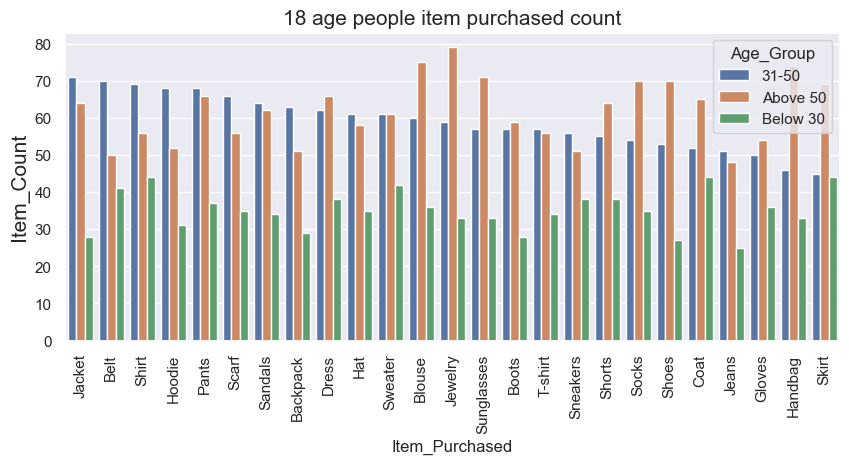

In [55]:
plt.figure(figsize=(10, 4))
sns.barplot(x="Item_Purchased", y="Purchase_Count",hue='Age_Group', data=df12)
plt.title("18 age people item purchased count", fontsize=15)
plt.xlabel("Item_Purchased", fontsize=12)
plt.ylabel("Item_Count", fontsize=15)

# Rotate x-axis labels
plt.xticks(rotation=90)

plt.show()

## Question 12: What was the order frequency of a gender?

In [56]:
query13="""
SELECT  Frequency_purchases, Gender, COUNT(Gender) as GenderOrder_count from shopping_trnd
group by Frequency_purchases, Gender
order by GenderOrder_count DESC;
"""
cursor.execute(query13)
result13 = cursor.fetchall()
df13=pd.DataFrame(result13,columns=['Frequency_purchases','Gender','GenderOrder_count'])
pd.set_option("display.max_rows",None)
df13

,Frequency_purchases,Gender,GenderOrder_count
0,Every 3 Months,Male,398
1,Quarterly,Male,394
2,Annually,Male,387
3,Fortnightly,Male,379
4,Monthly,Male,368
5,Weekly,Male,367
6,Bi-Weekly,Male,359
7,Bi-Weekly,Female,188
8,Every 3 Months,Female,186
9,Monthly,Female,185


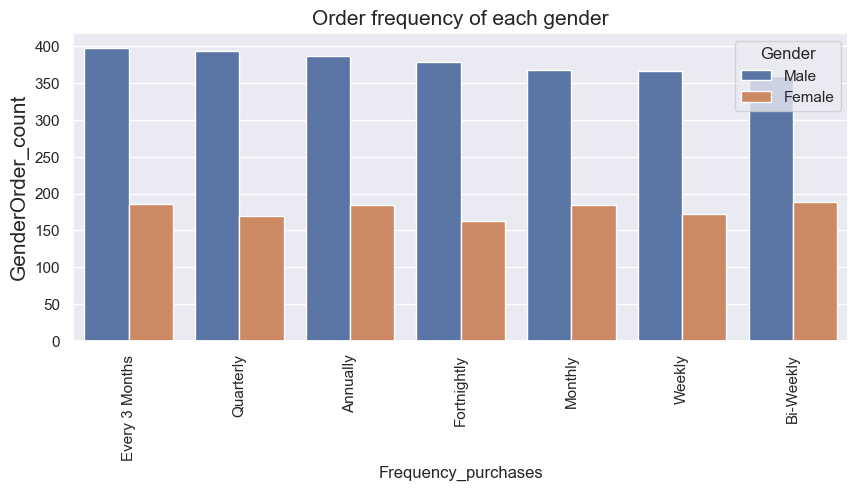

In [57]:
plt.figure(figsize=(10, 4))
sns.barplot(x="Frequency_purchases", y="GenderOrder_count",hue='Gender', data=df13)
plt.title("Order frequency of each gender", fontsize=15)
plt.xlabel("Frequency_purchases", fontsize=12)
plt.ylabel("GenderOrder_count", fontsize=15)

# Rotate x-axis labels
plt.xticks(rotation=90)

plt.show()

## Question 13: What payment method was most frequently utilized?

In [58]:
query15="""
SELECT  Payment_method,  SUM(Purchase_amount_usd) as total_payment from shopping_trnd
group by Payment_method
order by total_payment DESC;
"""
cursor.execute(query15)
result15 = cursor.fetchall()
df15=pd.DataFrame(result15,columns=['Payment_method','total_payment'])
pd.set_option("display.max_rows",None)
df15

,Payment_method,total_payment
0,Credit Card,40310
1,PayPal,40109
2,Cash,40002
3,Debit Card,38742
4,Venmo,37374
5,Bank Transfer,36544


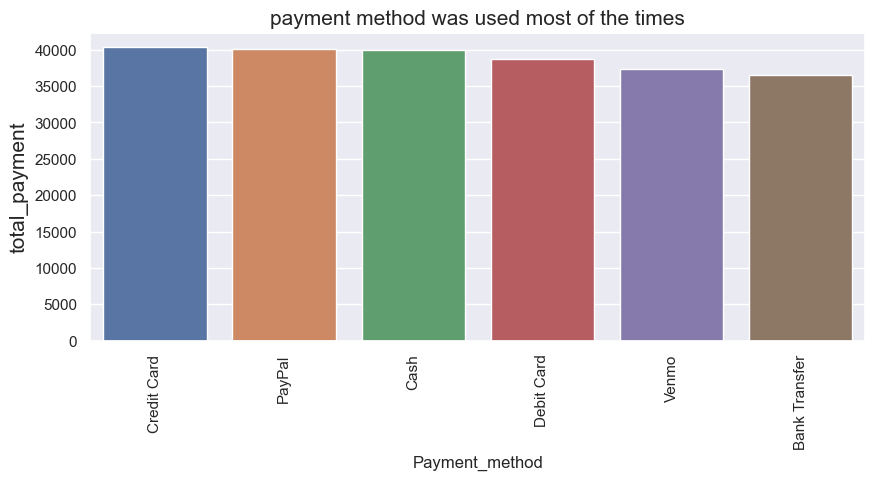

In [59]:
plt.figure(figsize=(10, 4))
sns.barplot(x="Payment_method", y="total_payment", data=df15)
plt.title("payment method was used most of the times", fontsize=15)
plt.xlabel("Payment_method", fontsize=12)
plt.ylabel("total_payment", fontsize=15)

# Rotate x-axis labels
plt.xticks(rotation=90)

plt.show()

## Question 14: Which color of a product was most frequently purchased by people?

In [60]:
query16="""
SELECT  Item_Purchased, Color, COUNT(Color) as Count_of_color from shopping_trnd
group by Item_Purchased, Color
order by Item_Purchased DESC;
"""
cursor.execute(query16)
result16 = cursor.fetchall()
df16=pd.DataFrame(result16,columns=['Item_Purchased','Color','Count_of_color'])
pd.set_option("display.max_rows",None)
df16

,Item_Purchased,Color,Count_of_color
0,T-shirt,Beige,2
1,T-shirt,Black,5
2,T-shirt,Blue,5
3,T-shirt,Brown,4
4,T-shirt,Charcoal,5
5,T-shirt,Cyan,3
6,T-shirt,Gold,3
7,T-shirt,Gray,7
8,T-shirt,Green,6
9,T-shirt,Indigo,7


In [61]:

un=df16['Item_Purchased'].unique()
Count_of_color=[]
item=[]
color=[]
for i in un:
    v=[]
    v3=[]
    v4=[]
    
    for j in range(len(df16['Item_Purchased'])):
        
        if df16['Item_Purchased'][j]==i:
            v.append(int(df16['Count_of_color'][j]))
            v3.append(df16['Item_Purchased'][j])
            v4.append(df16['Color'][j])
            
        else:
            pass
    Count_of_color.append(max(v))
    item.append(v3[v.index(max(v))])
    color.append(v4[v.index(max(v))])
    
dic16={
    'Item':un, "Color":color, 'Count_of_color':Count_of_color,
}
df16=pd.DataFrame(dic16)
df16

,Item,Color,Count_of_color
0,T-shirt,Violet,11
1,Sweater,Cyan,12
2,Sunglasses,Lavender,12
3,Socks,Black,10
4,Sneakers,Indigo,12
5,Skirt,Black,15
6,Shorts,Yellow,13
7,Shoes,Maroon,12
8,Shirt,Maroon,10
9,Scarf,Violet,12


## Question 15: What are the most commonly purchased sizes for each item?

In [62]:
query17="""
SELECT  Item_Purchased, Size, COUNT(Size) as Count_of_size from shopping_trnd
group by Item_Purchased, Size
order by Item_Purchased DESC;
"""
cursor.execute(query17)
result17 = cursor.fetchall()
df17=pd.DataFrame(result17,columns=['Item_Purchased','Size','Count_of_size'])
pd.set_option("display.max_rows",None)
df17

,Item_Purchased,Size,Count_of_size
0,T-shirt,L,41
1,T-shirt,M,66
2,T-shirt,S,24
3,T-shirt,XL,16
4,Sweater,L,42
5,Sweater,M,77
6,Sweater,S,27
7,Sweater,XL,18
8,Sunglasses,L,39
9,Sunglasses,M,73


## Question 16: What area exhibits the highest number of orders in terms of purchases?

In [63]:
query18="""
SELECT  Location,  
COUNT(Purchase_amount_usd) as number_of_order
from shopping_trnd
group by Location
order by number_of_order DESC;
"""
cursor.execute(query18)
result18 = cursor.fetchall()
df18=pd.DataFrame(result18,columns=['Location','number_of_order'])
pd.set_option("display.max_rows",None)
df18

,Location,number_of_order
0,Montana,96
1,California,95
2,Idaho,93
3,Illinois,92
4,Alabama,89
5,Minnesota,88
6,Nevada,87
7,Nebraska,87
8,New York,87
9,Delaware,86


## Question 17: What geographical area shows the highest total purchase amounts?

In [64]:
query19="""
SELECT  Location,  SUM(Purchase_amount_usd) as total_Purchase_amount_usd
from shopping_trnd
group by Location
order by total_Purchase_amount_usd DESC;
"""
cursor.execute(query19)
result19 = cursor.fetchall()
df19=pd.DataFrame(result19,columns=['Location','total_Purchase_amount_usd'])
pd.set_option("display.max_rows",None)
df19

,Location,total_Purchase_amount_usd
0,Montana,5784
1,Illinois,5617
2,California,5605
3,Idaho,5587
4,Nevada,5514
5,Alabama,5261
6,New York,5257
7,North Dakota,5220
8,West Virginia,5174
9,Nebraska,5172


## Question 18: How many times  item were purchased by subscribers and non-subscribers?

In [65]:
query20="""
SELECT  `Subscription Status`, COUNT(Purchase_amount_usd) as number_of_purchased
from shopping_trnd
group by `Subscription Status`
order by number_of_purchased DESC;
"""
cursor.execute(query20)
result20 = cursor.fetchall()
df20=pd.DataFrame(result20,columns=['Subscription Status','number_of_purchased'])
pd.set_option("display.max_rows",None)
df20

,Subscription Status,number_of_purchased
0,No,2847
1,Yes,1053


## Question 19: How many subscriber and non-subscriber were purchased items from a location? 

In [72]:
query21="""
SELECT  Location, `Subscription Status`, COUNT(`Subscription Status`) as subscount
from shopping_trnd
group by  Location, `Subscription Status`
order by Location DESC;
"""
cursor.execute(query21)
result21 = cursor.fetchall()
df21=pd.DataFrame(result21,columns=['Location','Subscription Status','subscount'])
pd.set_option("display.max_rows",None)
df21

,Location,Subscription Status,subscount
0,Wyoming,No,51
1,Wyoming,Yes,20
2,Wisconsin,No,62
3,Wisconsin,Yes,13
4,West Virginia,No,53
5,West Virginia,Yes,28
6,Washington,No,52
7,Washington,Yes,21
8,Virginia,No,53
9,Virginia,Yes,24


## Question 20: What is the total amount paid by both subscribers and non-subscribers?

In [73]:
query22="""
SELECT  `Subscription Status`, SUM(Purchase_amount_usd) as Total_purchased_amount
from shopping_trnd
group by `Subscription Status`
order by Total_purchased_amount DESC;
"""
cursor.execute(query22)
result22 = cursor.fetchall()
df22=pd.DataFrame(result22,columns=['Subscription Status','number_of_purchased'])
pd.set_option("display.max_rows",None)
df22

,Subscription Status,number_of_purchased
0,No,170436
1,Yes,62645


## Question 21: How many subscribers are categorized by gender, distinguishing between male and female subscribers?

In [78]:
query23="""
SELECT  Gender, `Subscription Status`, COUNT(`Subscription Status`) as subscription
from shopping_trnd
group by Gender, `Subscription Status`
order by subscription DESC;
"""
cursor.execute(query23)
result23 = cursor.fetchall()
df23=pd.DataFrame(result23,columns=['Gender','Subscription Status','number_of_purchased'])
pd.set_option("display.max_rows",None)
df23

,Gender,Subscription Status,number_of_purchased
0,Male,No,1599
1,Female,No,1248
2,Male,Yes,1053


## Question 22: How many orders were placed by subscribers compared to non-subscribers?

In [87]:
query24="""
SELECT  Age, `Subscription Status`, COUNT(`Subscription Status`) as total_subscription
from shopping_trnd
group by Age, `Subscription Status`
order by Age DESC;
"""
cursor.execute(query24)
result24 = cursor.fetchall()
df24=pd.DataFrame(result24,columns=['Age','Subscription Status','total_subscription'])

pd.set_option("display.max_rows",None)
df24

,Age,Subscription Status,total_subscription
0,70,No,46
1,70,Yes,21
2,69,No,67
3,69,Yes,21
4,68,No,60
5,68,Yes,15
6,67,No,39
7,67,Yes,15
8,66,No,55
9,66,Yes,16


## Question 23: What are the total sales and the total number of units sold for each item?

In [92]:
query25="""
SELECT  Item_Purchased,  COUNT(Purchase_amount_usd) as number_of_sell,
SUM(Purchase_amount_usd) as total_sell_amount
from shopping_trnd
group by Item_Purchased 
order by number_of_sell DESC;
"""
cursor.execute(query25)
result25 = cursor.fetchall()
df25=pd.DataFrame(result25,columns=['Item_Purchased','number_of_sell','total_sell_amount'])

pd.set_option("display.max_rows",None)
df25

,Item_Purchased,number_of_sell,total_sell_amount
0,Blouse,171,10410
1,Pants,171,10090
2,Jewelry,171,10010
3,Shirt,169,10332
4,Dress,166,10320
5,Sweater,164,9462
6,Jacket,163,9249
7,Coat,161,9275
8,Sunglasses,161,9649
9,Belt,161,9635


## Question 24: How many orders came from which season from which location?

In [99]:
query26="""
SELECT  Location, Season,   COUNT(Item_Purchased) as total_sell
from shopping_trnd
group by Location, Season
order by Location DESC;
"""
cursor.execute(query26)
result26 = cursor.fetchall()
df26=pd.DataFrame(result26,columns=['Location','Season','total_sell'])

pd.set_option("display.max_rows",None)
df26

,Location,Season,total_sell
0,Wyoming,Fall,20
1,Wyoming,Spring,18
2,Wyoming,Summer,11
3,Wyoming,Winter,22
4,Wisconsin,Fall,22
5,Wisconsin,Spring,10
6,Wisconsin,Summer,24
7,Wisconsin,Winter,19
8,West Virginia,Fall,21
9,West Virginia,Spring,22


##  Question 25: Which categories generated how many orders in each location?

In [102]:
query27="""
SELECT  Location, Category,  COUNT(Category) as total_sell_category
from shopping_trnd
group by Location, Category
order by Location DESC;
"""
cursor.execute(query27)
result27 = cursor.fetchall()
df27=pd.DataFrame(result27,columns=['Location','Category','total_sell_category'])

pd.set_option("display.max_rows",None)
df27

,Location,Category,total_sell_category
0,Wyoming,Accessories,23
1,Wyoming,Clothing,31
2,Wyoming,Footwear,11
3,Wyoming,Outerwear,6
4,Wisconsin,Accessories,23
5,Wisconsin,Clothing,37
6,Wisconsin,Footwear,12
7,Wisconsin,Outerwear,3
8,West Virginia,Accessories,31
9,West Virginia,Clothing,29


## Question 26: What are the highest, average, and lowest ratings achieved by each item?

In [106]:
query28="""
SELECT Item_Purchased, 
       MAX(`Review Rating`) AS best_rating, 
       MIN(`Review Rating`) AS lowest_rating,
       ROUND(AVG(`Review Rating`)) AS avg_rating
FROM shopping_trnd
GROUP BY Item_Purchased
ORDER BY Item_Purchased DESC;

"""
cursor.execute(query28)
result28 = cursor.fetchall()
df28=pd.DataFrame(result28,columns=['Item_Purchased','best_rating','avg_rating','lowest_rating'])

pd.set_option("display.max_rows",None)
df28

,Item_Purchased,best_rating,avg_rating,lowest_rating
0,T-shirt,5.0,2.5,4.0
1,Sweater,5.0,2.5,4.0
2,Sunglasses,5.0,2.5,4.0
3,Socks,5.0,2.5,4.0
4,Sneakers,5.0,2.5,4.0
5,Skirt,5.0,2.5,4.0
6,Shorts,5.0,2.5,4.0
7,Shoes,4.9,2.5,4.0
8,Shirt,5.0,2.5,4.0
9,Scarf,5.0,2.5,4.0


In [ ]:
cursor.close()
connection.close()